In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: nicer plots
plt.style.use("default")

# 1) Daten laden
df = pd.read_parquet("parlamint_at_with_sentiment.parquet")

# 2) Schneller Überblick
print(df.head())
print(df.info())
#print(df.describe(include="all"))

# 3) Zeilenanzahl und Zeitraum
print("Anzahl Zeilen:", len(df))
print("Min datum:", df["date"].min())
print("Max datum:", df["date"].max())

# 4) Fehlende Werte prüfen
print(df.isna().mean().sort_values(ascending=False))


                                                  ID       date  \
0  ParlaMint-AT_1996-03-14-020-XX-NRSITZ-00012_d7... 1996-03-14   
1  ParlaMint-AT_1996-03-14-020-XX-NRSITZ-00012_d7... 1996-03-14   
2  ParlaMint-AT_1996-03-14-020-XX-NRSITZ-00012_d7... 1996-03-14   
3  ParlaMint-AT_1996-03-14-020-XX-NRSITZ-00012_d7... 1996-03-14   
4  ParlaMint-AT_1996-03-14-020-XX-NRSITZ-00012_d7... 1996-03-14   

             speaker party         role  topic  \
0  Neisser, Heinrich   ÖVP  Chairperson  Other   
1  Neisser, Heinrich   ÖVP  Chairperson  Other   
2  Neisser, Heinrich   ÖVP  Chairperson  Other   
3    Schieder, Peter   SPÖ      Regular  Other   
4  Neisser, Heinrich   ÖVP  Chairperson  Other   

                                                text  year  \
0  Ich eröffne die 12. Sitzung des Nationalrates....  1996   
1  Hinsichtlich der eingelangten Verhandlungsgege...  1996   
2  Herr Abgeordneter Schieder, zur Geschäftsbehan...  1996   
3  Herr Präsident! Es steht hier in dieser schri

sent_label
neutral     153197
negative     71161
positive      7401
Name: count, dtype: int64
sent_label
neutral     66.10
negative    30.70
positive     3.19
Name: proportion, dtype: float64


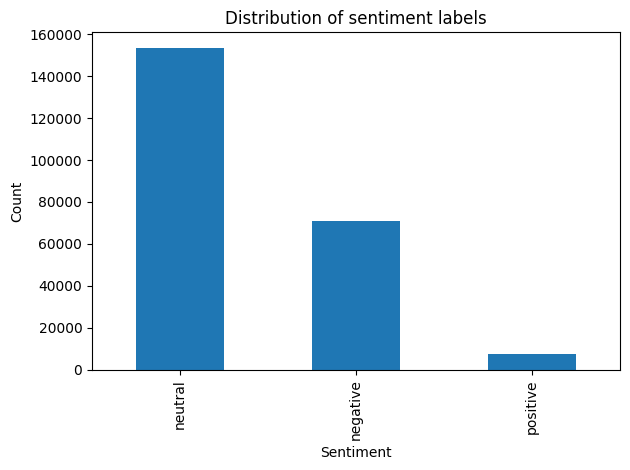

In [4]:
# Absolute Häufigkeiten
label_counts = df["sent_label"].value_counts()
print(label_counts)

# Relative Häufigkeiten in %
label_pct = df["sent_label"].value_counts(normalize=True) * 100
print(label_pct.round(2))

# Plot
ax = label_counts.plot(kind="bar")
ax.set_title("Distribution of sentiment labels")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


year
1996   -0.283337
1997   -0.276606
1998   -0.291205
1999   -0.271472
2000   -0.304592
2001   -0.293017
2002   -0.262531
2003   -0.290331
2004   -0.274771
2005   -0.257669
2006   -0.260374
2007   -0.238724
2008   -0.252811
2009   -0.263172
2010   -0.261838
2011   -0.253247
2012   -0.252480
2013   -0.251517
2014   -0.270917
2015   -0.255006
2016   -0.244688
2017   -0.260732
2018   -0.311700
2019   -0.294118
2020   -0.300063
2021   -0.319764
2022   -0.327374
Name: sent_value, dtype: float64


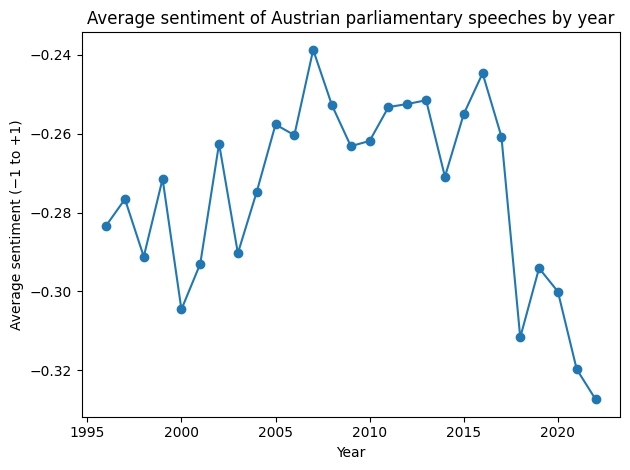

In [5]:
# Sicherstellen, dass 'year' vorhanden ist – sonst aus 'date' ableiten
if "year" not in df.columns:
    df["year"] = df["date"].dt.year

sent_by_year = (
    df.groupby("year")["sent_value"]
      .mean()
      .sort_index()
)

print(sent_by_year)

ax = sent_by_year.plot(marker="o")
ax.set_title("Average sentiment of Austrian parliamentary speeches by year")
ax.set_xlabel("Year")
ax.set_ylabel("Average sentiment (−1 to +1)")
plt.tight_layout()
plt.show()


party
NEOS       -0.591585
STRONACH   -0.553350
JETZT      -0.493528
BZÖ        -0.479190
LIF        -0.465868
Grüne      -0.455071
FPÖ        -0.288116
-          -0.254994
SPÖ        -0.244522
ÖVP        -0.218372
Name: sent_value, dtype: float64


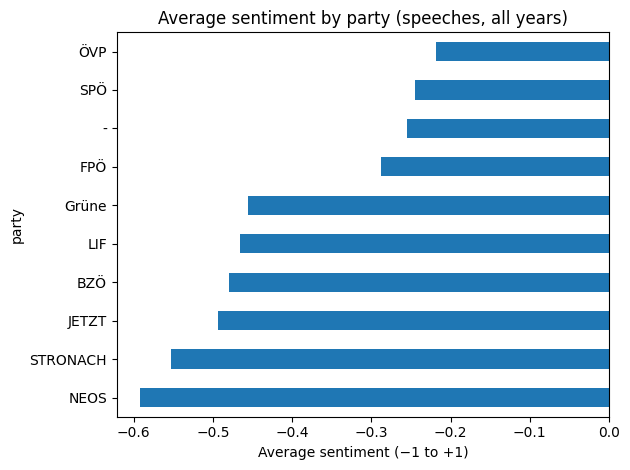

In [6]:
# Parteien mit genug Daten (z.B. mindestens 500 Beiträge)
party_counts = df["party"].value_counts()
major_parties = party_counts[party_counts >= 500].index

sent_by_party = (
    df[df["party"].isin(major_parties)]
      .groupby("party")["sent_value"]
      .mean()
      .sort_values()
)

print(sent_by_party)

ax = sent_by_party.plot(kind="barh")
ax.set_title("Average sentiment by party (speeches, all years)")
ax.set_xlabel("Average sentiment (−1 to +1)")
plt.tight_layout()
plt.show()


year       1996   1997   1998   1999   2000   2001   2002   2003   2004  \
party                                                                     
-        -0.250 -0.177 -0.211 -0.256 -0.349 -0.268 -0.284 -0.301 -0.347   
BZÖ         NaN    NaN    NaN    NaN    NaN    NaN -1.000    NaN    NaN   
FPÖ      -0.367 -0.338 -0.374 -0.360 -0.338 -0.326 -0.283 -0.234 -0.214   
Grüne    -0.496 -0.478 -0.517 -0.530 -0.534 -0.519 -0.517 -0.580 -0.545   
JETZT       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
LIF      -0.503 -0.463 -0.480 -0.403    NaN    NaN    NaN    NaN    NaN   
NEOS        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
SPÖ      -0.220 -0.231 -0.209 -0.208 -0.271 -0.281 -0.259 -0.295 -0.307   
STRONACH    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ÖVP      -0.216 -0.212 -0.242 -0.191 -0.241 -0.211 -0.171 -0.252 -0.232   

year       2005  ...   2013   2014   2015   2016   2017   2018   2019   2020  \
party            ..

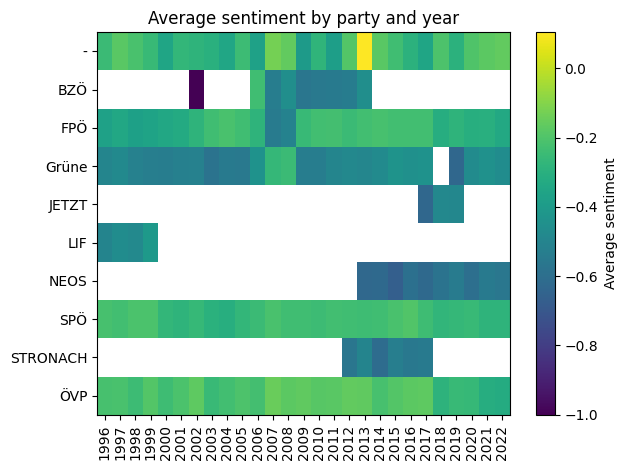

In [7]:
pivot_party_year = (
    df[df["party"].isin(major_parties)]
      .groupby(["party", "year"])["sent_value"]
      .mean()
      .reset_index()
      .pivot(index="party", columns="year", values="sent_value")
)

print(pivot_party_year.round(3))

# Optional quick & dirty heatmap (ohne seaborn)
plt.imshow(pivot_party_year, aspect="auto")
plt.colorbar(label="Average sentiment")
plt.yticks(range(len(pivot_party_year.index)), pivot_party_year.index)
plt.xticks(range(len(pivot_party_year.columns)), pivot_party_year.columns, rotation=90)
plt.title("Average sentiment by party and year")
plt.tight_layout()
plt.show()


In [8]:
import spacy

nlp = spacy.load("de_core_news_sm")


ModuleNotFoundError: No module named 'spacy'

In [ ]:
# z.B. 20.000 zufällige Redebeiträge
df_sample = df.sample(n=20000, random_state=42).copy()

len(df_sample)


20000

In [ ]:
def spacy_features(text, nlp_model):
    if not isinstance(text, str) or not text.strip():
        return {
            "token_count": 0,
            "sent_count": 0,
            "avg_token_len": 0.0,
            "adj_ratio": 0.0,
            "verb_ratio": 0.0,
            "pron_ratio": 0.0,
        }
    doc = nlp_model(text)
    tokens = [t for t in doc if not t.is_space]
    if not tokens:
        return {
            "token_count": 0,
            "sent_count": len(list(doc.sents)),
            "avg_token_len": 0.0,
            "adj_ratio": 0.0,
            "verb_ratio": 0.0,
            "pron_ratio": 0.0,
        }

    token_count = len(tokens)
    sent_count = max(len(list(doc.sents)), 1)
    avg_token_len = sum(len(t.text) for t in tokens) / token_count

    pos_counts = {}
    for t in tokens:
        pos_counts[t.pos_] = pos_counts.get(t.pos_, 0) + 1

    def ratio(tag):
        return pos_counts.get(tag, 0) / token_count

    return {
        "token_count": token_count,
        "sent_count": sent_count,
        "avg_token_len": avg_token_len,
        "adj_ratio": ratio("ADJ"),
        "verb_ratio": ratio("VERB"),
        "pron_ratio": ratio("PRON"),
    }


In [ ]:
from tqdm.auto import tqdm
tqdm.pandas(desc="spaCy features")

feat_series = df_sample["text"].progress_apply(lambda t: spacy_features(t, nlp))

feat_df = pd.DataFrame(list(feat_series))
df_spacy = pd.concat([df_sample.reset_index(drop=True), feat_df], axis=1)

df_spacy.head()


spaCy features:   0%|          | 0/20000 [00:00<?, ?it/s]

,ID,date,speaker,party,role,topic,text,year,sent_raw,sent_label,sent_score,sent_value,token_count,sent_count,avg_token_len,adj_ratio,verb_ratio,pron_ratio
0,ParlaMint-AT_2011-12-06-024-XXIV-NRSITZ-00135_...,2011-12-06,"Graf, Martin",FPÖ,Chairperson,Other,Zu einer zweiten Wortmeldung gelangt Herr Abge...,2011,"{'label': 'neutral', 'score': 0.9887790679931641}",neutral,0.988779,0,19,3,4.684211,0.052632,0.052632,0.000000
1,ParlaMint-AT_2000-10-18-021-XXI-NRSITZ-00040_d...,2000-10-18,"Fischer, Heinz",SPÖ,Chairperson,Other,Zu einer tatsächlichen Berichtigung hat sich F...,2000,"{'label': 'neutral', 'score': 0.99622642993927}",neutral,0.996226,0,19,2,5.263158,0.052632,0.105263,0.210526
2,ParlaMint-AT_2019-11-13-027-XXVII-NRSITZ-00003...,2019-11-13,"Herr, Julia Elisabeth",SPÖ,Regular,Environment,Sehr geehrte Frau Nationalratspräsidentin! Wer...,2019,"{'label': 'negative', 'score': 0.8847212195396...",negative,0.884721,-1,829,48,4.827503,0.038601,0.073583,0.078408
3,ParlaMint-AT_2016-07-07-025-XXV-NRSITZ-00138_d...,2016-07-07,"Kopf, Karlheinz",ÖVP,Chairperson,Other,Als Nächster gelangt Herr Abgeordneter Eßl zu ...,2016,"{'label': 'neutral', 'score': 0.9999243021011353}",neutral,0.999924,0,12,2,4.250000,0.000000,0.083333,0.000000
4,ParlaMint-AT_2012-06-13-024-XXIV-NRSITZ-00160_...,2012-06-13,"Graf, Martin",FPÖ,Chairperson,Other,Die nächste Sitzung des Nationalrates berufe i...,2012,"{'label': 'neutral', 'score': 0.9957780838012695}",neutral,0.995778,0,36,3,4.888889,0.111111,0.083333,0.027778


In [ ]:
length_by_sent = (
    df_spacy.groupby("sent_label")["token_count"]
            .mean()
            .sort_values()
)
print(length_by_sent)


sent_label
neutral     220.447619
positive    530.406149
negative    558.862971
Name: token_count, dtype: float64


In [ ]:
adj_by_sent = (
    df_spacy.groupby("sent_label")["adj_ratio"]
            .mean()
            .sort_values()
)
print(adj_by_sent)


sent_label
negative    0.032680
positive    0.032958
neutral     0.046871
Name: adj_ratio, dtype: float64


In [ ]:
spacy_major_parties = df_spacy["party"].value_counts()
spacy_major_parties = spacy_major_parties[spacy_major_parties >= 500].index

adj_by_party = (
    df_spacy[df_spacy["party"].isin(spacy_major_parties)]
             .groupby("party")["adj_ratio"]
             .mean()
             .sort_values()
)

print(adj_by_party)


party
Grüne    0.037293
SPÖ      0.039726
FPÖ      0.041370
ÖVP      0.046999
Name: adj_ratio, dtype: float64


In [ ]:
import os

os.makedirs("figures", exist_ok=True)


In [ ]:
df = pd.read_parquet("parlamint_at_with_sentiment.parquet")

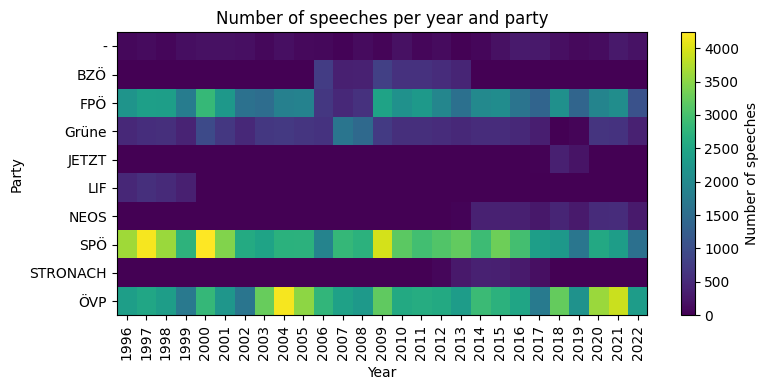

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nur größere Parteien
party_counts = df["party"].value_counts()
major_parties = party_counts[party_counts >= 500].index

year_party = (
    df[df["party"].isin(major_parties)]
      .groupby(["year", "party"])
      .size()
      .unstack(fill_value=0)
)

plt.figure(figsize=(8, 4))
plt.imshow(year_party.T, aspect="auto")
plt.colorbar(label="Number of speeches")
plt.yticks(range(len(year_party.columns)), year_party.columns)
plt.xticks(range(len(year_party.index)), year_party.index, rotation=90)
plt.xlabel("Year")
plt.ylabel("Party")
plt.title("Number of speeches per year and party")
plt.tight_layout()
plt.savefig("figures/speeches_year_party.png")
plt.show()
plt.close()


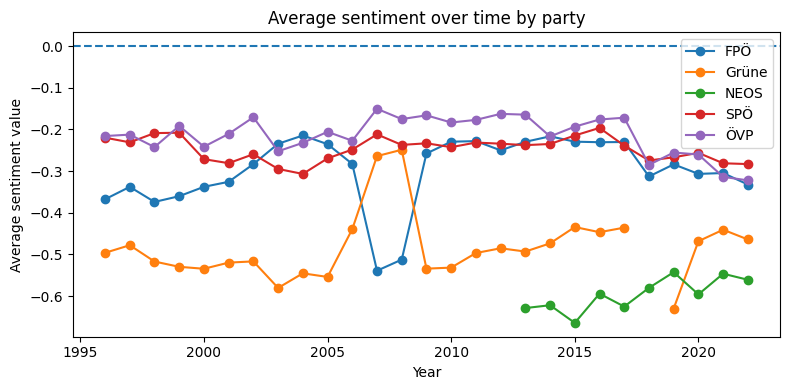

In [ ]:
import matplotlib.pyplot as plt

major_parties = ["ÖVP", "SPÖ", "FPÖ", "Grüne", "NEOS"]  # anpassen an deine Daten

sent_by_year_party = (
    df[df["party"].isin(major_parties)]
      .groupby(["year", "party"])["sent_value"]
      .mean()
      .unstack()
      .sort_index()
)

plt.figure(figsize=(8, 4))
for party in sent_by_year_party.columns:
    plt.plot(sent_by_year_party.index,
             sent_by_year_party[party],
             marker="o",
             label=party)

plt.axhline(0, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Average sentiment value")
plt.title("Average sentiment over time by party")
plt.legend()
plt.tight_layout()
plt.savefig("sentiment_by_year_party.png")
plt.show()
plt.close()


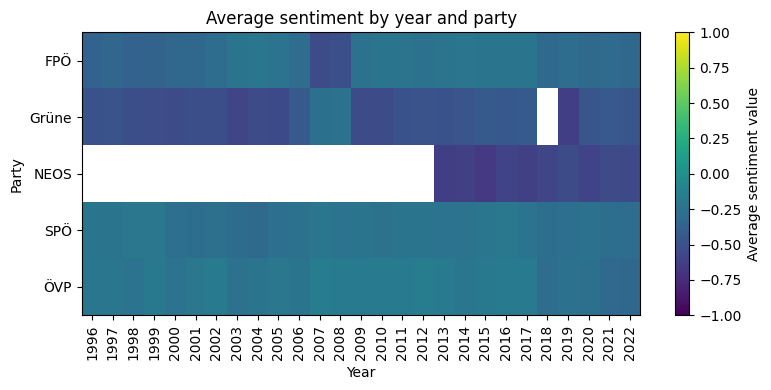

In [ ]:
sent_heat = sent_by_year_party  # aus dem vorherigen Code

plt.figure(figsize=(8, 4))
im = plt.imshow(sent_heat.T, aspect="auto", vmin=-1, vmax=1)
plt.colorbar(im, label="Average sentiment value")
plt.yticks(range(len(sent_heat.columns)), sent_heat.columns)
plt.xticks(range(len(sent_heat.index)), sent_heat.index, rotation=90)
plt.xlabel("Year")
plt.ylabel("Party")
plt.title("Average sentiment by year and party")
plt.tight_layout()
plt.savefig("sentiment_heatmap_year_party.png")
plt.show()
plt.close()


In [ ]:
party_style = (
    df_spacy[df_spacy["party"].isin(major_parties)]
      .groupby("party")[["token_count", "adj_ratio"]]
      .mean()
)

print(party_style)


       token_count  adj_ratio
party                        
FPÖ     318.074415   0.041370
Grüne   708.642960   0.037293
NEOS    754.083333   0.034006
SPÖ     250.409064   0.039726
ÖVP     261.047980   0.046999


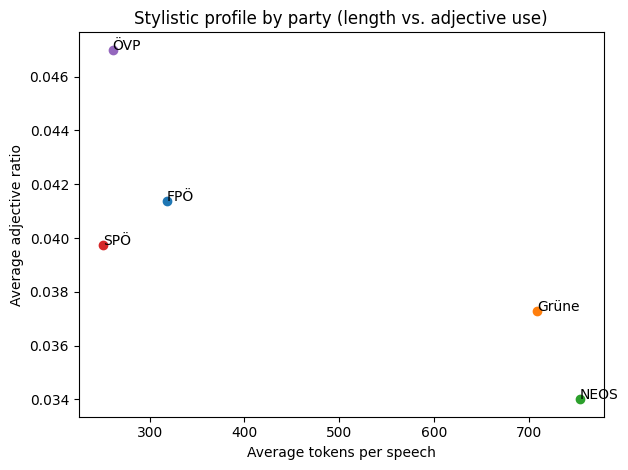

In [ ]:
plt.figure()
for party, row in party_style.iterrows():
    plt.scatter(row["token_count"], row["adj_ratio"])
    plt.text(row["token_count"], row["adj_ratio"], party)

plt.xlabel("Average tokens per speech")
plt.ylabel("Average adjective ratio")
plt.title("Stylistic profile by party (length vs. adjective use)")
plt.tight_layout()
plt.savefig("style_scatter_party.png")
plt.show()  
plt.close()


<Figure size 640x480 with 0 Axes>

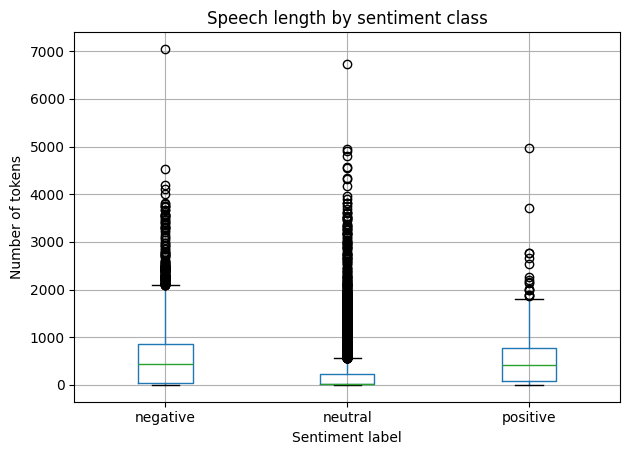

In [ ]:
plt.figure()
df_spacy.boxplot(column="token_count", by="sent_label")
plt.ylabel("Number of tokens")
plt.xlabel("Sentiment label")
plt.title("Speech length by sentiment class")
plt.suptitle("")  # removes default pandas title
plt.tight_layout()
plt.savefig("box_token_by_sentiment.png")
plt.show()  
plt.close()


Average sentiment by year:
year
1996   -0.283337
1997   -0.276606
1998   -0.291205
1999   -0.271472
2000   -0.304592
2001   -0.293017
2002   -0.262531
2003   -0.290331
2004   -0.274771
2005   -0.257669
2006   -0.260374
2007   -0.238724
2008   -0.252811
2009   -0.263172
2010   -0.261838
2011   -0.253247
2012   -0.252480
2013   -0.251517
2014   -0.270917
2015   -0.255006
2016   -0.244688
2017   -0.260732
2018   -0.311700
2019   -0.294118
2020   -0.300063
2021   -0.319764
2022   -0.327374
Name: sent_value, dtype: float64
Anzahl negativer Reden im Topic-Korpus: 71,161

Hot-Topic-Token pro Jahr (aus negativen Reden):
1996 -> bei
1997 -> bei
1998 -> bei
1999 -> abgeordneter
2000 -> abg
2001 -> bei
2002 -> zusatzfrage
2003 -> abg
2004 -> bei
2005 -> abg
2006 -> abg
2007 -> abg
2008 -> sehr
2009 -> abg
2010 -> abg
2011 -> abg
2012 -> abg
2013 -> bei
2014 -> abg
2015 -> abgeordneter
2016 -> abg
2017 -> sehr
2018 -> bei
2019 -> abgeordneter
2020 -> zu wort
2021 -> wort
2022 -> wort


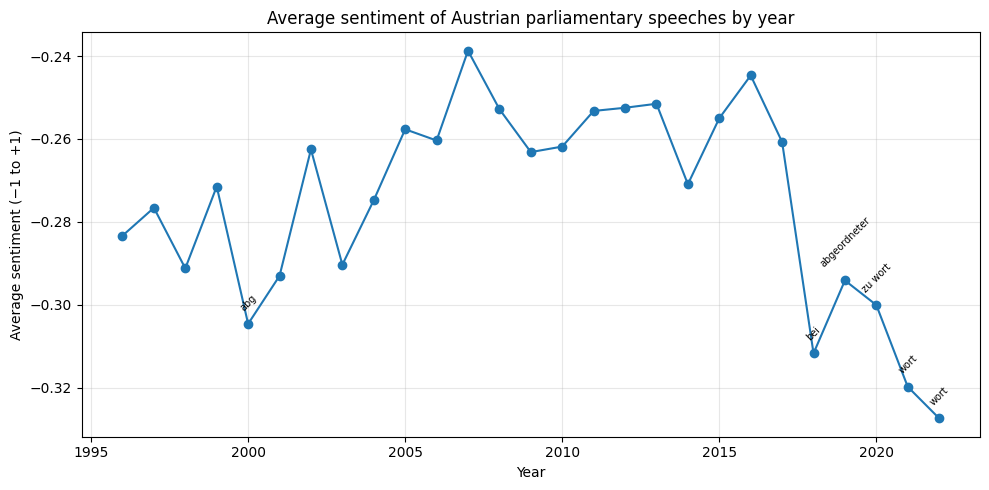

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# ------------------------------------------------------
# 0) Jahrsspalte sicherstellen & Zeitraum einschränken
# ------------------------------------------------------
if "year" not in df.columns:
    df["year"] = df["date"].dt.year

df = df[(df["year"] >= 1996) & (df["year"] <= 2022)]

# ------------------------------------------------------
# 1) Sentiment pro Jahr (wie bisher)
# ------------------------------------------------------
sent_by_year = (
    df.groupby("year")["sent_value"]
      .mean()
      .sort_index()
)

print("Average sentiment by year:")
print(sent_by_year)

# ------------------------------------------------------
# 2) Datengrundlage für Topics: nur negative Reden
# ------------------------------------------------------
df_neg = df[df["sent_value"] == -1].copy()

print(f"Anzahl negativer Reden im Topic-Korpus: {len(df_neg):,}")

# ------------------------------------------------------
# 3) Stopwort-Liste (Deutsch + Parlamentsfloskeln + Nerv-Wörter)
# ------------------------------------------------------
base_stopwords = {
    # Artikel / Pronomen / Konjunktionen / Hilfsverben
    "der","die","das","den","dem","des","ein","eine","einer","einem","einen",
    "und","oder","aber","doch","nur","auch","noch","schon","nicht","kein","keine",
    "ich","du","er","sie","es","wir","ihr","man","sich","mich","uns","euch",
    "am","im","in","auf","an","aus","mit","für","vom","von","beim","über","unter",
    "wer","wie","was","wo","warum","wieso","weshalb","dass","daß","weil","wenn","dann",
    "wird","werden","wurde","wurden","hat","haben","habe","sein","ist","sind","war",
    "waren","kann","können","muss","müssen","soll","sollen","wollen","will",
    # generische Substantive
    "jahr","jahre","zeit","frage","antwort","thema","punkte","bereich","land",
    "menschen","herrschaften","staat","politik","politische","politiker",
    # Parlamentsfloskeln
    "herr","frau","präsident","präsidentin","abgeordnete","abgeordneten",
    "kollege","kollegin","kollegen","kolleginnen",
    "nationalrat","parlament","plenum","sitzung","tagesordnung",
    "regierung","bundesregierung","bundeskanzler","bundeskanzlerin",
    "bundesminister","bundesministerin","minister","ministerin",
    "antrag","gesetz","gesetzes","vorlage",
    # Länder/Parteien
    "österreich","österreichs","österreichische","österreichischen",
    "övp","spö","fpö","neos","grüne","grünen","bzö","jetzt","stronach","lif",
    # bisherige „Hot Topics“, die keine Themen sind
    "bitte","danke"
}

extra_forbidden_global = {
    # falls trotz allem noch zu generisch
    "staat","politik","politische","politiker","regierung","eu"
}

# ------------------------------------------------------
# 4) Hilfsfunktion: Hot-Topic-Wort pro Jahr
#    (jahrweise TF-IDF mit eigenen Vektorizer)
# ------------------------------------------------------
from collections import OrderedDict

def compute_hot_topic_terms_per_year(df_neg, base_stopwords, extra_forbidden=None,
                                     min_df=10, max_df=0.7, ngram_range=(1,2),
                                     top_k=50):
    """
    Liefert ein Dict: year -> bestes Topic-Token (z.B. 'corona' oder 'corona pandemie'),
    basierend auf jahrweise berechnetem TF-IDF über negative Reden.
    """
    if extra_forbidden is None:
        extra_forbidden = set()

    year_topics = OrderedDict()
    for year in sorted(df_neg["year"].unique()):
        sub = df_neg[df_neg["year"] == year]
        if len(sub) < min_df:
            # zu wenig Dokumente, um sinnvolle TF-IDF-Werte zu haben
            year_topics[year] = None
            continue

        texts = sub["text"].astype(str).tolist()

        vec = TfidfVectorizer(
            lowercase=True,
            stop_words=list(base_stopwords),
            max_df=max_df,
            min_df=min_df,
            ngram_range=ngram_range,
            token_pattern=r"(?u)\b\w\w+\b"
        )

        X = vec.fit_transform(texts)
        terms = np.array(vec.get_feature_names_out())

        # mittlere TF-IDF-Werte über alle Dokumente des Jahres
        mean_tfidf = X.mean(axis=0).A1
        idx_sorted = mean_tfidf.argsort()[::-1]

        chosen = None
        for idx in idx_sorted[:top_k]:
            token = terms[idx]
            # Heuristiken: keine reinen Zahlen, nicht zu kurz, nicht verboten
            if len(token) < 3:
                continue
            if token.isdigit():
                continue
            if token in extra_forbidden:
                continue
            chosen = token
            break

        year_topics[year] = chosen

    return year_topics

hot_topic_by_year = compute_hot_topic_terms_per_year(
    df_neg,
    base_stopwords,
    extra_forbidden=extra_forbidden_global,
    min_df=15,           # je nach Corpusgröße anpassen
    max_df=0.6,
    ngram_range=(1,2),   # 1- und 2-Wort-Phrasen
    top_k=50
)

print("\nHot-Topic-Token pro Jahr (aus negativen Reden):")
for y, tok in hot_topic_by_year.items():
    print(y, "->", tok)

# ------------------------------------------------------
# 5) Sentiment-Plot mit Hot-Topics beschriften
# ------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sent_by_year.index, sent_by_year.values, marker="o")
ax.set_title("Average sentiment of Austrian parliamentary speeches by year")
ax.set_xlabel("Year")
ax.set_ylabel("Average sentiment (−1 to +1)")
ax.grid(True, alpha=0.3)

# nur die K negativsten Jahre annotieren
ANNOTATE_ONLY_K_WORST = True
K_WORST = 6

if ANNOTATE_ONLY_K_WORST:
    worst_years = set(sent_by_year.nsmallest(K_WORST).index.tolist())
else:
    worst_years = set(sent_by_year.index.tolist())

for year, y_val in sent_by_year.items():
    label = hot_topic_by_year.get(year)
    if label is None:
        continue
    if year not in worst_years:
        continue

    ax.annotate(
        label,
        xy=(year, y_val),
        xytext=(0, 8),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=7,
        rotation=45
    )

plt.tight_layout()

import os
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/sentiment_with_hot_topics_yearwise_tfidf.pdf")

plt.show()
plt.close()


Anzahl negativer Reden: 71,161
pseudo_topic
sonstiges      49655
sanktionen      7638
migration       5552
corona          2561
ibiza           2041
ukraine         1902
finanzkrise     1273
bvt              539
Name: count, dtype: int64
Trainingsbeispiele (pseudo-gelabelt): 21,506


C:\Users\noahg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



ML-basiertes Hot Topic pro Jahr:
1996 -> sanktionen
1997 -> sanktionen
1998 -> sanktionen
1999 -> sanktionen
2000 -> sanktionen
2001 -> sanktionen
2002 -> sanktionen
2003 -> sanktionen
2004 -> sanktionen
2005 -> sanktionen
2006 -> sanktionen
2007 -> sanktionen
2008 -> sanktionen
2009 -> migration
2010 -> migration
2011 -> sanktionen
2012 -> migration
2013 -> migration
2014 -> migration
2015 -> migration
2016 -> migration
2017 -> migration
2018 -> migration
2019 -> migration
2020 -> corona
2021 -> corona
2022 -> corona


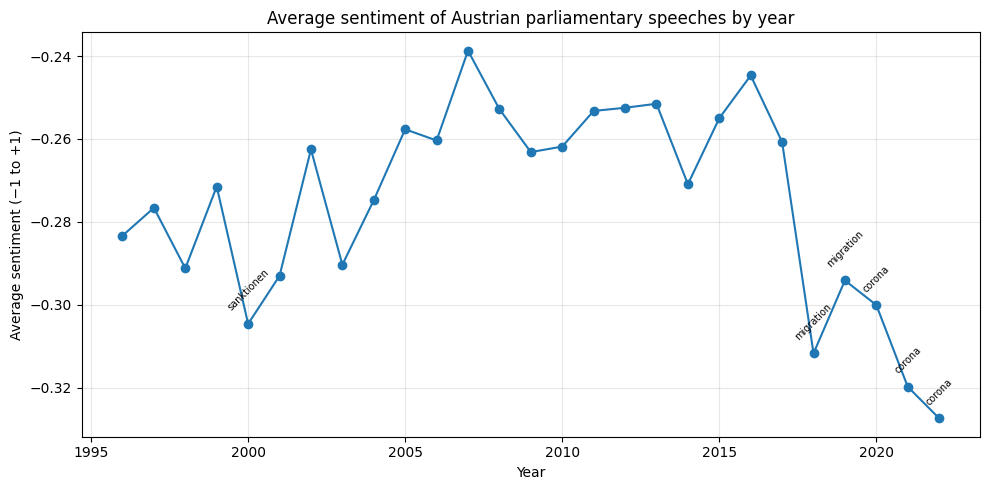

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# ------------------------------------------------------
# 0) Grund-Setup
# ------------------------------------------------------
if "year" not in df.columns:
    df["year"] = df["date"].dt.year

df = df[(df["year"] >= 1996) & (df["year"] <= 2022)].copy()

# Optional: nur negative Reden als Basis für Themen
df_neg = df[df["sent_value"] == -1].copy()

print(f"Anzahl negativer Reden: {len(df_neg):,}")

# ------------------------------------------------------
# 1) Themen-Definition mit Seed-Wörtern (anpassbar!)
# ------------------------------------------------------
TOPIC_CONFIG = {
    "sanktionen": [
        "sanktion", "sanktionen", "eu-sanktionen", "eu sanktionen",
        "schüssel", "koalition", "övp fpö", "haider"
    ],
    "bvt": [
        "bvt", "verfassungsschutz", "geheimdienst", "hausdurchsuchung",
        "datenaffäre", "sicherheitsbehörde"
    ],
    "ibiza": [
        "ibiza", "strache", "ibiza-video", "videoaffäre",
        "korruption", "parteispenden"
    ],
    "finanzkrise": [
        "finanzkrise", "bankenkrise", "hypo", "hypo alpe",
        "konjunkturpaket"
    ],
    "migration": [
        "flüchtling", "flüchtlinge", "asyl", "migration",
        "asylwerber", "grenze", "grenzschutz"
    ],
    "corona": [
        "corona", "covid", "pandemie", "lockdown", "impfung",
        "impfpflicht", "infektion", "inzidenz", "schutzmaßnahme"
    ],
    "ukraine": [
        "ukraine", "ukrainekrieg", "russland", "putin",
        "sanktionen", "krieg", "donbass"
    ],
    # fallback-Thema, falls nix passt
    "sonstiges": []
}

TOPIC_NAMES = list(TOPIC_CONFIG.keys())
REAL_TOPICS = [t for t in TOPIC_NAMES if t != "sonstiges"]

# ------------------------------------------------------
# 2) Stopwort-Liste (wie vorher + nervige Wörter)
# ------------------------------------------------------
base_stopwords = {
    "der","die","das","den","dem","des","ein","eine","einer","einem","einen",
    "und","oder","aber","doch","nur","also","auch","noch","schon","nicht",
    "kein","keine","ich","du","er","sie","es","wir","ihr","man","sich","mich",
    "uns","euch","am","im","in","auf","an","aus","mit","für","vom","von","beim",
    "über","unter","wer","wie","was","wo","warum","wieso","weshalb","dass",
    "daß","weil","wenn","dann","wird","werden","wurde","wurden","hat","haben",
    "habe","sein","ist","sind","war","waren","kann","können","muss","müssen",
    "soll","sollen","wollen","will",
    "jahr","jahre","zeit","frage","antwort","thema","punkte","bereich","land",
    "menschen","herrschaften",
    "herr","frau","präsident","präsidentin","abgeordnete","abgeordneten",
    "kollege","kollegin","kollegen","kolleginnen",
    "nationalrat","parlament","plenum","sitzung","tagesordnung",
    "regierung","bundesregierung","bundeskanzler","bundeskanzlerin",
    "bundesminister","bundesministerin","minister","ministerin",
    "antrag","gesetz","gesetzes","vorlage",
    "österreich","österreichs","österreichische","österreichischen",
    "övp","spö","fpö","neos","grüne","grünen","bzö","jetzt","stronach","lif",
    "bitte","danke"
}

# ------------------------------------------------------
# 3) TF-IDF-Features bauen (auf allen negativen Reden)
# ------------------------------------------------------
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=list(base_stopwords),
    max_df=0.7,
    min_df=20,
    ngram_range=(1,2),  # erlaubt 'corona pandemie', 'bvt affäre' etc.
    token_pattern=r"(?u)\b\w\w+\b"
)

X_all = vectorizer.fit_transform(df_neg["text"].astype(str))
vocab = np.array(vectorizer.get_feature_names_out())

# ------------------------------------------------------
# 4) Pseudo-Labels mittels Seed-Wörter erzeugen
# ------------------------------------------------------
def label_speech_with_topic(text, topic_config):
    text_lower = text.lower()
    best_topic = None
    best_hits = 0
    for topic, seeds in topic_config.items():
        if topic == "sonstiges":
            continue
        hits = 0
        for seed in seeds:
            if seed in text_lower:
                hits += 1
        if hits > best_hits:
            best_hits = hits
            best_topic = topic
    # mind. 1 Treffer, sonst 'sonstiges'
    if best_hits == 0:
        return "sonstiges"
    return best_topic

df_neg["pseudo_topic"] = df_neg["text"].astype(str).apply(
    lambda t: label_speech_with_topic(t, TOPIC_CONFIG)
)

print(df_neg["pseudo_topic"].value_counts())

# Trainingsdaten: nur echte Themen, 'sonstiges' raus
train_mask = df_neg["pseudo_topic"] != "sonstiges"
df_train = df_neg[train_mask].copy()

print(f"Trainingsbeispiele (pseudo-gelabelt): {len(df_train):,}")

X_train = X_all[train_mask.values]
y_train = df_train["pseudo_topic"].values

# ------------------------------------------------------
# 5) ML-Modell trainieren (Logistic Regression, multi-class)
# ------------------------------------------------------
clf = LogisticRegression(
    max_iter=200,
    multi_class="multinomial",
    solver="lbfgs"
)

clf.fit(X_train, y_train)

# ------------------------------------------------------
# 6) Themenwahrscheinlichkeiten für alle negativen Reden
# ------------------------------------------------------
proba = clf.predict_proba(X_all)
classes = clf.classes_  # z.B. ['bvt', 'corona', 'ibiza', 'migration', 'sanktionen', ...]

proba_df = pd.DataFrame(proba, columns=classes, index=df_neg.index)

# ------------------------------------------------------
# 7) Aggregation: Hot Topic pro Jahr
# ------------------------------------------------------
topic_proba_by_year = proba_df.join(df_neg["year"]).groupby("year").mean()

hot_topic_by_year = {}
for year, row in topic_proba_by_year.iterrows():
    # höchster Wahrscheinlichkeitswert über alle echten Topics
    best_topic = row[REAL_TOPICS].idxmax()
    hot_topic_by_year[year] = best_topic

print("\nML-basiertes Hot Topic pro Jahr:")
for y in sorted(hot_topic_by_year.keys()):
    print(y, "->", hot_topic_by_year[y])

# ------------------------------------------------------
# 8) Sentiment-Plot + ML-Hot-Topics annotieren
# ------------------------------------------------------
sent_by_year = (
    df.groupby("year")["sent_value"]
      .mean()
      .sort_index()
)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sent_by_year.index, sent_by_year.values, marker="o")
ax.set_title("Average sentiment of Austrian parliamentary speeches by year")
ax.set_xlabel("Year")
ax.set_ylabel("Average sentiment (−1 to +1)")
ax.grid(True, alpha=0.3)

# nur die K negativsten Jahre annotieren
ANNOTATE_ONLY_K_WORST = True
K_WORST = 6

if ANNOTATE_ONLY_K_WORST:
    worst_years = set(sent_by_year.nsmallest(K_WORST).index.tolist())
else:
    worst_years = set(sent_by_year.index.tolist())

for year, y_val in sent_by_year.items():
    label = hot_topic_by_year.get(year)
    if label is None:
        continue
    if year not in worst_years:
        continue

    ax.annotate(
        label,
        xy=(year, y_val),
        xytext=(0, 8),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=7,
        rotation=45
    )

plt.tight_layout()

import os
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/sentiment_with_ml_hot_topics.pdf")

plt.show()
plt.close()


year
1996   -0.283337
1997   -0.276606
1998   -0.291205
1999   -0.271472
2000   -0.304592
2001   -0.293017
2002   -0.262531
2003   -0.290331
2004   -0.274771
2005   -0.257669
2006   -0.260374
2007   -0.238724
2008   -0.252811
2009   -0.263172
2010   -0.261838
2011   -0.253247
2012   -0.252480
2013   -0.251517
2014   -0.270917
2015   -0.255006
2016   -0.244688
2017   -0.260732
2018   -0.311700
2019   -0.294118
2020   -0.300063
2021   -0.319764
2022   -0.327374
Name: sent_value, dtype: float64


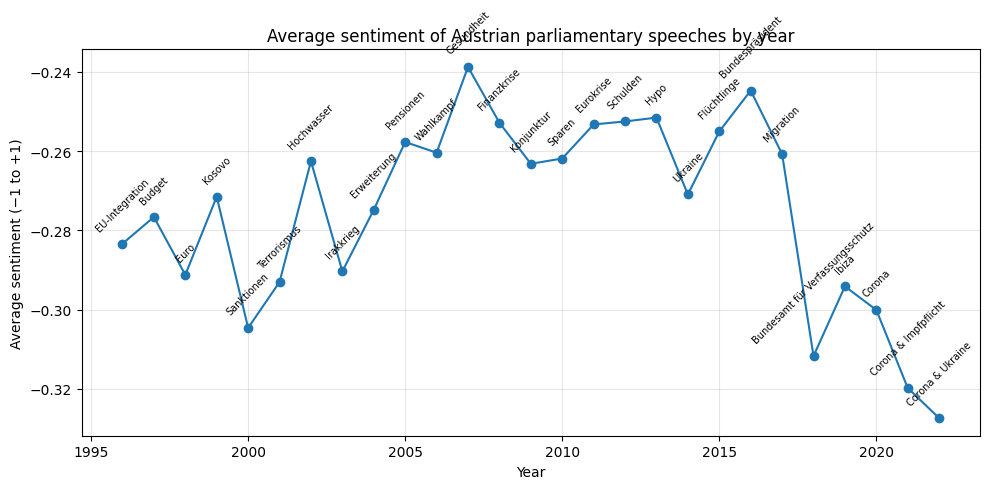

In [ ]:
import matplotlib.pyplot as plt

# Sicherstellen, dass 'year' vorhanden ist – sonst aus 'date' ableiten
if "year" not in df.columns:
    df["year"] = df["date"].dt.year

# Sentiment nach Jahr berechnen
sent_by_year = (
    df.groupby("year")["sent_value"]
      .mean()
      .sort_index()
)

print(sent_by_year)

# Manuelle Hot-Topic-Zuordnung
hot_topics = {
    1996: "EU-Integration",
    1997: "Budget",
    1998: "Euro",
    1999: "Kosovo",
    2000: "Sanktionen",
    2001: "Terrorismus",
    2002: "Hochwasser",
    2003: "Irakkrieg",
    2004: "Erweiterung",
    2005: "Pensionen",
    2006: "Wahlkampf",
    2007: "Gesundheit",
    2008: "Finanzkrise",
    2009: "Konjunktur",
    2010: "Sparen",
    2011: "Eurokrise",
    2012: "Schulden",
    2013: "Hypo",
    2014: "Ukraine",
    2015: "Flüchtlinge",
    2016: "Bundespräsident",
    2017: "Migration",
    2018: "Bundesamt für Verfassungsschutz",
    2019: "Ibiza",
    2020: "Corona",
    2021: "Corona & Impfpflicht",
    2022: "Corona & Ukraine",
}

# Plot erstellen
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sent_by_year.index, sent_by_year.values, marker="o")
ax.set_title("Average sentiment of Austrian parliamentary speeches by year")
ax.set_xlabel("Year")
ax.set_ylabel("Average sentiment (−1 to +1)")
ax.grid(True, alpha=0.3)

# --- Option A: alle Jahre annotieren ---
years_to_annotate = sent_by_year.index  # alle

# --- Option B: nur die k negativsten Jahre annotieren (auskommentieren, wenn du das willst) ---
# k = 6
# years_to_annotate = sent_by_year.nsmallest(k).index

for year, y_val in sent_by_year.items():
    if year not in hot_topics:
        continue
    if year not in years_to_annotate:
        continue

    label = hot_topics[year]

    ax.annotate(
        label,
        xy=(year, y_val),
        xytext=(0, 8),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=7,
        rotation=45
    )

plt.tight_layout()

import os
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/sentiment_with_manual_hot_topics.pdf")

plt.show()
plt.close()


# Tiefergehende Analyse

Negative Peaks Hot Topics Year 2000, 2018, 2021-22

In [19]:
def analyze_year(df, year):
    print(f"=== Analysis for year {year} ===\n")
    df_peak = df[df["year"] == year]

    print("Speeches:", len(df_peak))
    print("\nAverage sentiment:", df_peak["sent_value"].mean())

    print("\nSentiment by party:")
    display(df_peak.groupby("party")["sent_value"].mean().sort_values())

    print("\nTop topics:")
    display(df_peak["topic"].value_counts().head(15))

    return df_peak

In [20]:
df_2000 = analyze_year(df, 2000)
df_2018 = analyze_year(df, 2018)
df_2021 = analyze_year(df, 2021)
df_2022 = analyze_year(df, 2022)

=== Analysis for year 2000 ===

Speeches: 11018

Average sentiment: -0.30459248502450537

Sentiment by party:


party
Grüne   -0.534247
-       -0.349462
FPÖ     -0.337571
SPÖ     -0.271182
ÖVP     -0.241294
Name: sent_value, dtype: float64


Top topics:


topic
Other                    5956
Macroeconomics            806
Mix                       449
Law and Crime             411
Civil Rights              368
Government Operations     340
International Affairs     334
Education                 316
Labor                     287
Agriculture               247
Defense                   239
Social Welfare            237
Transportation            202
Health                    155
Environment               142
Name: count, dtype: int64

=== Analysis for year 2018 ===

Speeches: 8598

Average sentiment: -0.3117003954408002

Sentiment by party:


party
GRÜNE   -0.733333
NEOS    -0.580046
JETZT   -0.485255
FPÖ     -0.312736
ÖVP     -0.284920
SPÖ     -0.274379
-       -0.203593
Name: sent_value, dtype: float64


Top topics:


topic
Other                    4402
Education                 388
Law and Crime             351
Mix                       340
Labor                     325
Health                    302
Civil Rights              289
International Affairs     281
Macroeconomics            265
Social Welfare            257
Government Operations     227
Immigration               178
Domestic Commerce         175
Environment               158
Technology                120
Name: count, dtype: int64

=== Analysis for year 2021 ===

Speeches: 9851

Average sentiment: -0.31976449091462794

Sentiment by party:


party
NEOS    -0.546125
Grüne   -0.440514
ÖVP     -0.313625
FPÖ     -0.304495
SPÖ     -0.281051
GRÜNE   -0.202381
-       -0.175439
Name: sent_value, dtype: float64


Top topics:


topic
Other                    5055
Health                    667
Macroeconomics            437
Mix                       367
Government Operations     358
Civil Rights              337
Law and Crime             328
Labor                     318
Education                 306
Social Welfare            209
Domestic Commerce         207
Agriculture               194
Environment               166
International Affairs     162
Transportation            140
Name: count, dtype: int64

=== Analysis for year 2022 ===

Speeches: 5929

Average sentiment: -0.32737392477652216

Sentiment by party:


party
NEOS    -0.560656
Grüne   -0.463918
FPÖ     -0.332079
ÖVP     -0.322070
SPÖ     -0.282983
-       -0.163366
GRÜNE   -0.109375
Name: sent_value, dtype: float64


Top topics:


topic
Other                    3031
Macroeconomics            384
Health                    358
Social Welfare            237
International Affairs     219
Mix                       214
Energy                    175
Government Operations     162
Agriculture               154
Education                 140
Domestic Commerce         111
Civil Rights              107
Immigration               106
Law and Crime             105
Defense                   105
Name: count, dtype: int64

<Axes: xlabel='party'>

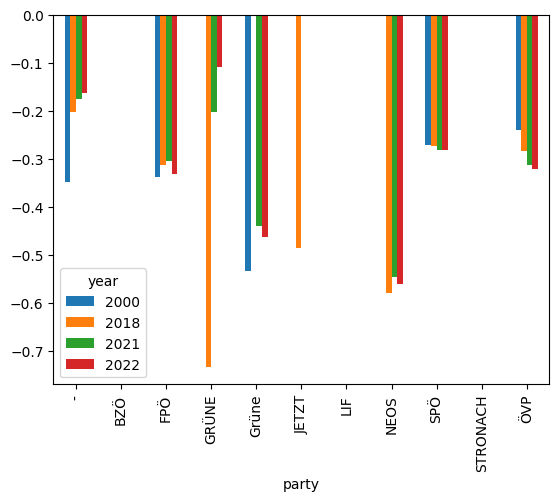

In [21]:
df.pivot_table(
    values="sent_value",
    index="party",
    columns="year",
    aggfunc="mean"
).loc[:, [2000, 2018, 2021, 2022]].plot(kind="bar")